# Tutorial 7: Using Python in Excel files

Excel is highly rated by professionals for its user-friendly interface. As a result:
- It's a popular tool for data management and analysis.
- Excel is widely used in a wide range of organizations, including private companies, public institutions, universities and so on.
- Professionals in a wide variety of positions - analysts, managers, executives, researchers - use Excel on a daily basis.
- It enables both rapid statistical calculations and more advanced data analysis.

Given its wide adoption, mastering Excel is essential for data professionals, data scientists and academics. Although Excel is excellent for small tasks and quick calculations, it has limitations for larger datasets and more complex analyses, which require the use of more powerful languages, like Python.

Python is currently the most popular general-purpose programming language worldwide. Compared to Excel, Python offers:
- Powerful advantages for data analysis,
- A more flexible, efficient, and scalable approach,
- The ability to automate repetitive tasks and handle large datasets that might challenge Excel, and
- Advanced analysis capabilities through libraries like pandas, NumPy, and Matplotlib.

Moreover, Python is open-source, allowing continuous development and access to a vast ecosystem of tools that extend its functionality.

Combining Python with Excel can bring out the best in both tools. Python libraries like pandas make it easy to work directly with Excel files, enabling you to leverage Excel’s simplicity alongside Python’s computational power. This tutorial will guide you through integrating the two for enhanced data processing and analysis.

Pandas is more efficient than Excel for automating data processing tasks, including the processing of Excel files. Pandas offers very interesting methods for reading any type of data from Excel files. You can also export your Pandas results to Excel, if that's what your target audience prefers. Pandas is ideal for other routine data analysis tasks, such as :
- rapid exploratory data analysis (EDA)
- drawing attractive graphs
- feeding data into machine learning tools such as scikit-learn
- building machine learning models on your data transferring cleaned and processed data to a large number of data tools</font> <a id='home'></a>

The aim of this tutorial is to show you how to work with Excel files in Pandas. We will cover the following concepts:
- setting up a computer with the necessary software
- reading data from Excel files into pandas
- exploring data in Pandas
- visualizing data in Pandas using the matplotlib visualization library
- manipulating and reshaping data in Pandas
- transferring data from Pandas to Excel

1. [The Data set](#dataset)
2. [Reading data from the Excel file](#reading)
3. [Exploring the data](#exploring)
4. [Statistics](#statistics)


## The Data set <a id="dataset"></a> ([top](#home))

In this tutorial, we will work with a multi-sheet Excel file created from Kaggle's IMDb Scores data. You can download the file in the left-hand panel if you are working on Binder or by clicking on the following link: [movies.xlsx](https://github.com/matgithub-picardy/ExcelPythonCourse/raw/refs/heads/main/movies.xlsx).

First, we can open the Excel file for an initial exploration of the data. Each line (observation) corresponds to a film, with information about that film: year, genre, language, country, budget, etc. First, we'll describe the database (1916 to 2016, American movies, etc.), propose some initial statistics on the database, and then determine the distribution of the films' audience ratings, identify the films with the highest audience ratings, net revenues, etc. We'll analyze and explore this data first in Excel, then use Python, so that you can see by yourself how well Pandas can work with Excel data in Python.


## Reading data from the Excel file <a id="reading"></a> ([top](#home))
A quick examination of the Excel file reveals three sheets containing information on mostly American films: '1900s,' '2000s,' and '2010s.' The titles of the sheets indicate that the films correspond to these years (but we'll have to be sure). 

Then, we need to import the data from the Excel file into pandas. To do that, we start by importing the pandas module. Run the code in the cell below by clicking on the cell and pressing Shift+Enter:

In [11]:
import pandas as pd

excel_file = 'movies.xlsx'

try:
    # Attempts to read the Excel file into a DataFrame
    movies = pd.read_excel(excel_file)
    print("File loaded successfully.")
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")

File loaded successfully.


### Code explanation
* `import pandas as pd`: Imports the pandas library to handle data in structured formats like Excel files.
* `excel_file = 'Tutorial_PythonExcel/movies.xlsx'`: Here, the variable `excel_file` is set to the file path of your Excel file. This approach makes it easy to update the file path if you want to load a different file later.
* `try` block: This try-except block handles potential errors:
    - `pd.read_excel(excel_file)`: The method `read_excel` reads the specified Excel file into a pandas DataFrame (`movies`), a useful data pandas structure for organizing and manipulating data. If no sheet name is specified, the method will read the first sheet in the index (as shown below).
    - Success message: If the file loads without issues, it prints "File loaded successfully."

As a reminder, to call a method in Python—a function associated with a particular object—you place the method name after the object, separated by a dot (`.`). Let's take a simple example:

In [3]:
my_list = [1, 2, 3]
my_list.append(4)# Calls the 'append' method on the 'my_list' object to add an item`
print(my_list)

[1, 2, 3, 4]


In this example, `append` is the method, and `my_list` is the object.

### Display top rows

We now want to have a quick look at the first rows of the Dataframe:

In [6]:
movies.head()

,Title,Year,Genres,Language,Country,Content Rating,Duration,Aspect Ratio,Budget,Gross Earnings,...,Facebook Likes - Actor 1,Facebook Likes - Actor 2,Facebook Likes - Actor 3,Facebook Likes - cast Total,Facebook likes - Movie,Facenumber in posters,User Votes,Reviews by Users,Reviews by Crtiics,IMDB Score
0,Intolerance: Love's Struggle Throughout the Ages,1916,Drama|History|War,NaN,USA,Not Rated,123,1.33,385907.0,NaN,...,436,22,9.0,481,691,1,10718,88,69.0,8.0
1,Over the Hill to the Poorhouse,1920,Crime|Drama,NaN,USA,NaN,110,1.33,100000.0,3000000.0,...,2,2,0.0,4,0,1,5,1,1.0,4.8
2,The Big Parade,1925,Drama|Romance|War,NaN,USA,Not Rated,151,1.33,245000.0,NaN,...,81,12,6.0,108,226,0,4849,45,48.0,8.3
3,Metropolis,1927,Drama|Sci-Fi,German,Germany,Not Rated,145,1.33,6000000.0,26435.0,...,136,23,18.0,203,12000,1,111841,413,260.0,8.3
4,Pandora's Box,1929,Crime|Drama|Romance,German,Germany,Not Rated,110,1.33,NaN,9950.0,...,426,20,3.0,455,926,1,7431,84,71.0,8.0


We use the method `head()` to easily display the first rows of our DataFrame. This lets you quickly verify that the data was loaded as expected. If no argument is passed, it will display first five rows. If a number is passed, it will display the equal number of rows from the top.

In [7]:
movies.head(7)

,Title,Year,Genres,Language,Country,Content Rating,Duration,Aspect Ratio,Budget,Gross Earnings,...,Facebook Likes - Actor 1,Facebook Likes - Actor 2,Facebook Likes - Actor 3,Facebook Likes - cast Total,Facebook likes - Movie,Facenumber in posters,User Votes,Reviews by Users,Reviews by Crtiics,IMDB Score
0,Intolerance: Love's Struggle Throughout the Ages,1916,Drama|History|War,NaN,USA,Not Rated,123,1.33,385907.0,NaN,...,436,22,9.0,481,691,1,10718,88,69.0,8.0
1,Over the Hill to the Poorhouse,1920,Crime|Drama,NaN,USA,NaN,110,1.33,100000.0,3000000.0,...,2,2,0.0,4,0,1,5,1,1.0,4.8
2,The Big Parade,1925,Drama|Romance|War,NaN,USA,Not Rated,151,1.33,245000.0,NaN,...,81,12,6.0,108,226,0,4849,45,48.0,8.3
3,Metropolis,1927,Drama|Sci-Fi,German,Germany,Not Rated,145,1.33,6000000.0,26435.0,...,136,23,18.0,203,12000,1,111841,413,260.0,8.3
4,Pandora's Box,1929,Crime|Drama|Romance,German,Germany,Not Rated,110,1.33,NaN,9950.0,...,426,20,3.0,455,926,1,7431,84,71.0,8.0
5,The Broadway Melody,1929,Musical|Romance,English,USA,Passed,100,1.37,379000.0,2808000.0,...,77,28,4.0,109,167,8,4546,71,36.0,6.3
6,Hell's Angels,1930,Drama|War,English,USA,Passed,96,1.20,3950000.0,NaN,...,431,12,4.0,457,279,1,3753,53,35.0,7.8


In [12]:
movies_sheet1 = pd.read_excel(excel_file, sheet_name=0, index_col=0)
movies_sheet1.head()

,Year,Genres,Language,Country,Content Rating,Duration,Aspect Ratio,Budget,Gross Earnings,Director,...,Facebook Likes - Actor 1,Facebook Likes - Actor 2,Facebook Likes - Actor 3,Facebook Likes - cast Total,Facebook likes - Movie,Facenumber in posters,User Votes,Reviews by Users,Reviews by Crtiics,IMDB Score
Title,,,,,,,,,,,,,,,,,,,,,
Intolerance: Love's Struggle Throughout the Ages,1916,Drama|History|War,NaN,USA,Not Rated,123,1.33,385907.0,NaN,D.W. Griffith,...,436,22,9.0,481,691,1,10718,88,69.0,8.0
Over the Hill to the Poorhouse,1920,Crime|Drama,NaN,USA,NaN,110,1.33,100000.0,3000000.0,Harry F. Millarde,...,2,2,0.0,4,0,1,5,1,1.0,4.8
The Big Parade,1925,Drama|Romance|War,NaN,USA,Not Rated,151,1.33,245000.0,NaN,King Vidor,...,81,12,6.0,108,226,0,4849,45,48.0,8.3
Metropolis,1927,Drama|Sci-Fi,German,Germany,Not Rated,145,1.33,6000000.0,26435.0,Fritz Lang,...,136,23,18.0,203,12000,1,111841,413,260.0,8.3
Pandora's Box,1929,Crime|Drama|Romance,German,Germany,Not Rated,110,1.33,NaN,9950.0,Georg Wilhelm Pabst,...,426,20,3.0,455,926,1,7431,84,71.0,8.0


You notice that this method lets us know the number of columns and rows presented (at the bottom left of the output: `5 rows x 25 columns`). Here, we learn that the first sheet contains 25 columns, i.e. 25 variables for each observation, from "Title" to "IMDB Score" + line numbers.

Excel files often contain multiple sheets, so specifying which sheet to read can be important for Pandas. The `read_excel` method in pandas includes a sheet_name argument that allows you to select a specific sheet by name or number. Sheet numbers start from zero; if sheet_name is not specified, pandas defaults to the first sheet (index 0).

### Display first row by sheet

By default, pandas assigns a numeric index (starting at zero) for each row. However, if your data contains a column with unique values, you may prefer to use this column as the index for easier data referencing. You can do this by setting the index_col argument to the column's number (e.g., index_col=0 for the first column) or to a list of numbers for a multi-index.

The first column in our Excel file is labeled 'Title.' We use this 'Title' column as the index by setting index_col=0, and we look at the first rows:

As you noticed above, our Excel data file has three sheets. We already read the first sheet in a DataFrame above. Note that there are now only 24 columns, because the line numbers of the first column have been removed.

Now, using the same syntax, we also read the first lines of the other two sheets:

In [13]:
movies_sheet2 = pd.read_excel(excel_file, sheet_name=1, index_col=0)
movies_sheet2.head()

,Year,Genres,Language,Country,Content Rating,Duration,Aspect Ratio,Budget,Gross Earnings,Director,...,Facebook Likes - Actor 1,Facebook Likes - Actor 2,Facebook Likes - Actor 3,Facebook Likes - cast Total,Facebook likes - Movie,Facenumber in posters,User Votes,Reviews by Users,Reviews by Crtiics,IMDB Score
Title,,,,,,,,,,,,,,,,,,,,,
102 Dalmatians,2000,Adventure|Comedy|Family,English,USA,G,100.0,1.85,85000000.0,66941559.0,Kevin Lima,...,2000.0,795.0,439.0,4182,372,1,26413,77.0,84.0,4.8
28 Days,2000,Comedy|Drama,English,USA,PG-13,103.0,1.37,43000000.0,37035515.0,Betty Thomas,...,12000.0,10000.0,664.0,23864,0,1,34597,194.0,116.0,6.0
3 Strikes,2000,Comedy,English,USA,R,82.0,1.85,6000000.0,9821335.0,DJ Pooh,...,939.0,706.0,585.0,3354,118,1,1415,10.0,22.0,4.0
Aberdeen,2000,Drama,English,UK,NaN,106.0,1.85,6500000.0,64148.0,Hans Petter Moland,...,844.0,2.0,0.0,846,260,0,2601,35.0,28.0,7.3
All the Pretty Horses,2000,Drama|Romance|Western,English,USA,PG-13,220.0,2.35,57000000.0,15527125.0,Billy Bob Thornton,...,13000.0,861.0,820.0,15006,652,2,11388,183.0,85.0,5.8


In [14]:
movies_sheet3 = pd.read_excel(excel_file, sheet_name=2, index_col=0)
movies_sheet3.head()

,Year,Genres,Language,Country,Content Rating,Duration,Aspect Ratio,Budget,Gross Earnings,Director,...,Facebook Likes - Actor 1,Facebook Likes - Actor 2,Facebook Likes - Actor 3,Facebook Likes - cast Total,Facebook likes - Movie,Facenumber in posters,User Votes,Reviews by Users,Reviews by Crtiics,IMDB Score
Title,,,,,,,,,,,,,,,,,,,,,
127 Hours,2010.0,Adventure|Biography|Drama|Thriller,English,USA,R,94.0,1.85,18000000.0,18329466.0,Danny Boyle,...,11000.0,642.0,223.0,11984,63000,0.0,279179,440.0,450.0,7.6
3 Backyards,2010.0,Drama,English,USA,R,88.0,NaN,300000.0,NaN,Eric Mendelsohn,...,795.0,659.0,301.0,1884,92,0.0,554,23.0,20.0,5.2
3,2010.0,Comedy|Drama|Romance,German,Germany,Unrated,119.0,2.35,NaN,59774.0,Tom Tykwer,...,24.0,20.0,9.0,69,2000,0.0,4212,18.0,76.0,6.8
8: The Mormon Proposition,2010.0,Documentary,English,USA,R,80.0,1.78,2500000.0,99851.0,Reed Cowan,...,191.0,12.0,5.0,210,0,0.0,1138,30.0,28.0,7.1
A Turtle's Tale: Sammy's Adventures,2010.0,Adventure|Animation|Family,English,France,PG,88.0,2.35,NaN,NaN,Ben Stassen,...,783.0,749.0,602.0,3874,0,2.0,5385,22.0,56.0,6.1


### Concatenate sheets

Since the three sheets contain similar data, but for different records (films), we create a **single DataFrame from the three DataFrames** created above. To do this, we use the pandas method `concat` (as in concatenation, which literally means “to concatenate”) with the names of the three Dataframes as arguments, and assign the result to the new Dataframe object we call `films`.

Keeping the same Dataframe name as before, we overwrite the previously created DataFrame:

In [15]:
movies = pd.concat([movies_sheet1, movies_sheet2, movies_sheet3])

We can check whether the concatenation has been successful by checking the number of rows in the final dataFrame by calling the shape method, which will give us the number of rows and columns.

In [16]:
movies.shape

(5042, 24)

We obtain `(5042, 24)`, which corresponds to 5 042 rows and 24 columns. If the number of columns corresponds to the figures obtained above, we can also check the number of rows directly by summing the rows in each sheet of the Excel file (taking care to subtract 3 for headers): 1 339 + 1 605 + 2 101 - 3 = 5 042 (3 for headers).

### Using the ExcelFile class to read multiple sheets
To work with multiple sheets from the same Excel file, we can also use the `ExcelFile` class, which allows us to achieve the same result more quickly. We begin by wrapping the Excel file with `ExcelFile`, then passing it to the method read_excel:

In [17]:
xlsx = pd.ExcelFile(excel_file)
movies_sheets = []
for sheet in xlsx.sheet_names:
   movies_sheets.append(xlsx.parse(sheet))
movies = pd.concat(movies_sheets)

movies.shape

(5042, 25)

### Code explanation
* `xlsx = pd.ExcelFile(excel_file`: Reads the Excel file specified by excel_file. This allows access to all the sheets in the workbook.
* `movies_sheets = []`: Creates an empty list `movies_sheets` to store the dataframes corresponding to each sheet in the Excel file.
* `for sheet in xlsx.sheet_names:`: This loop iterates over the names of all sheets in the Excel file (retrieved using xlsx.sheet_names).
    * `movies_sheets.append(xlsx.parse(sheet))`: For each sheet, xlsx.parse(sheet) reads the data and appends it to the movies_sheets list.
* `movies = pd.concat(movies_sheets)`: The pd.concat() function is used to concatenate all the dataframes in the movies_sheets list into a single dataframe called movies.
* `movies.shape`: Outputs the shape of the combined dataframe, providing information about the number of rows and columns.


### Why choose ExcelFile?

If your Excel file contains a large number of sheets and you need to create a lot of dataframes, ExcelFile is more practical and efficient than `read_excel`. With ExcelFile, you only need to access the Excel file once to build the final dataframe. With `read_excel`, the Excel file is accessed as many times as there are sheets in the file. This can have a cost in terms of performance if the Excel file contains many sheets with a large number of lines.

### Quiz #1
**What does the pd.ExcelFile() function do?**

1. Loads a specific sheet from an Excel file
2. Reads the entire Excel file into a DataFrame
3. Allows access to all sheets in an Excel workbook
4. Converts an Excel file to a CSV file

<details>
<summary>Click here to see the answer</summary>

**The correct answer is:** 3. Allows access to all sheets in an Excel workbook

</details>

### Quiz #2
**How are the dataframes from each sheet combined into a single dataframe?**

1. Using the merge() function
2. Using the join() function
3. Using the pd.concat() function
4. Using the pd.append() function

<details>
<summary>Click here to see the answer</summary>

**The correct answer is:** 3. Using the pd.concat() function

</details>

### Quiz #3
**If the Excel file has 3 sheets with 100 rows each, what will be the shape of the combined dataframe?**

1. (100, 3)
2. (300, n)
3. (3, 100)
4. (100, 100)

<details>
<summary>Click here to see the answer</summary>

**The correct answer is:** 2. (300, n) (where n is the number of columns)

</details'>

### Quiz #4
** What type of object the movies.shape return?**

1. The names of the sheets in the Excel file
2. The total number of sheets in the Excel file
3. A tuple representing the number of rows and columns in the dataframe
4. The first few rows of the dataframe

<details>
<summary>Click here to see the answer</summary>

**The correct answer is:** 3. A tuple representing the number of rows and columns in the DataFrame

</details>

### Activity #1:
You can use the code cell below to test the codes proposed in this activity.

**1. List sheet names**
- Use `print(xlsx.sheet_names)` to display the sheet names

**2. Inspect a sample sheet**
- Use the variable `movies_sheets` to inspect the first 5 lines of the sheet titled “'2000s”. Discuss what columns are available and how they might relate to columns in the other sheets.

**3. Inspect the data**
- Use `movies.info()` to understand the structure and content of the combined data. What does `movies.info()` reveal about the data types? How many columns have missing values? Note: The`info()` method is helpful for quickly assessing data quality before further analysis.

**4. Count the rows from each sheet**
- To confirm that each sheet was added correctly, print the number of rows from each individual sheet before combining, and compare it with the total rows in movies. Use `[df.shape[0] for df in movies_sheets]` to create a list of row counts for each sheet, then sum them up to match the total row count in movies.

Let's explain the code `[df.shape[0] for df in movies_sheets]`:
- The variable `df` represents each individual DataFrame in `movies_sheets` which is a list containing each sheet loaded as a separate DataFrame.
- `df.shape` returns a tuple representing the dimensions of `df`, where `df.shape[0]` is the number of rows (`df.shape[1]` is the number of columns).
- The list comprehension [df.shape[0] for df in movies_sheets] collects the row count of each sheet into a new list

Now, consider the following:
- Why is it important to verify the contents of each sheet before combining them?
- What are the benefits of using `info()` when working with new datasets?

## Exploring the data <a id="exploring"></a> ([top](#home))
Now that we've had a first look at the movie dataset from our Excel file, we can start exploring the database with the help of pandas. A pandas dataframe stores data in a tabular format, just as Excel does by displaying data in a sheet. Pandas has a whole set of built-in methods for exploring the dataFrame we've created from the Excel file.

We've already seen the `head()` and `shape` methods in the previous section for displaying the first rows of a dataframe or finding out the number of rows and columns. Let's now look at some other useful methods for data exploration.

### Display end data
Just as the `head()` method returns the first rows of a dataframe, the `tail()` method displays the end rows of a dataframe. If no parameter is given, only the last five lines are displayed.

In [18]:
movies.tail()

,Title,Year,Genres,Language,Country,Content Rating,Duration,Aspect Ratio,Budget,Gross Earnings,...,Facebook Likes - Actor 1,Facebook Likes - Actor 2,Facebook Likes - Actor 3,Facebook Likes - cast Total,Facebook likes - Movie,Facenumber in posters,User Votes,Reviews by Users,Reviews by Crtiics,IMDB Score
1599,War & Peace,NaN,Drama|History|Romance|War,English,UK,TV-14,NaN,16.00,NaN,NaN,...,1000.0,888.0,502.0,4528,11000,1.0,9277,44.0,10.0,8.2
1600,Wings,NaN,Comedy|Drama,English,USA,NaN,30.0,1.33,NaN,NaN,...,685.0,511.0,424.0,1884,1000,5.0,7646,56.0,19.0,7.3
1601,Wolf Creek,NaN,Drama|Horror|Thriller,English,Australia,NaN,NaN,2.00,NaN,NaN,...,511.0,457.0,206.0,1617,954,0.0,726,6.0,2.0,7.1
1602,Wuthering Heights,NaN,Drama|Romance,English,UK,NaN,142.0,NaN,NaN,NaN,...,27000.0,698.0,427.0,29196,0,2.0,6053,33.0,9.0,7.7
1603,Yu-Gi-Oh! Duel Monsters,NaN,Action|Adventure|Animation|Family|Fantasy,Japanese,Japan,NaN,24.0,NaN,NaN,NaN,...,0.0,NaN,NaN,0,124,0.0,12417,51.0,6.0,7.0


You'll notice that dataframe tail observations have missing observations that have been filled in with NaN (for Not a Number). You can view the corresponding data directly in the Excel file. What do you see?

### Sort data
In Excel, sorting by one or more columns helps organize data based on specific values. In pandas, we achieve this using the methid `sort_values`. For example, to sort our movies DataFrame by the "Gross Earnings" column, we can quickly identify the highest-grossing films in our dataset.

In [19]:
sorted_by_gross = movies.sort_values(['Gross Earnings'], ascending=False)

### Code explanation

* `movies.sort_values([...])`: This method sorts the dataframe movies by the specified column(s). Here, `['Gross Earnings']` tells pandas to sort based on the values in the "Gross Earnings" column.
* `ascending=False`: By default, sort_values sorts in ascending (smallest to largest) order. Setting `ascending=False` reverses this, sorting in descending order (largest to smallest).

The data being now sorted by value in a column, we can extract some interesting information. For example, we can display the top 10 highest gross earnings, and, to identify the corresponding films, the top 10 highest gross earnings with the titles.

In [20]:
print('Top 10 highest gross earnings:')
print(sorted_by_gross['Gross Earnings'].head(10))

print('\n') # Displays a vertical space 

print('Top 10 films with the highest gross earnings:')
print(sorted_by_gross[['Title', 'Gross Earnings']].head(10))

Top 10 highest gross earnings:
1867    760505847.0
1027    658672302.0
1263    652177271.0
610     623279547.0
611     623279547.0
1774    533316061.0
1281    474544677.0
226     460935665.0
1183    458991599.0
618     448130642.0
Name: Gross Earnings, dtype: float64


Top 10 films with the highest gross earnings:
                                           Title  Gross Earnings
1867                                     Avatar      760505847.0
1027                                    Titanic      658672302.0
1263                             Jurassic World      652177271.0
610                                The Avengers      623279547.0
611                                The Avengers      623279547.0
1774                            The Dark Knight      533316061.0
1281  Star Wars: Episode I - The Phantom Menace      474544677.0
226          Star Wars: Episode IV - A New Hope      460935665.0
1183                    Avengers: Age of Ultron      458991599.0
618                       The Dark

**Task:** Modify the code in the cell above to find out the directors or actors of these films.


### Plot data
Now, let's visualize the data for the top 10 films by gross earnings. We'll use `Matplotlib`, a powerful visualization library in Python that integrates well with pandas for creating charts and graphs. With just a few lines of code,`Matplotlib` allows us to generate clear, insightful plots.

Working in Jupyter Notebook, we can configure `Matplotlib` to display plots directly below the code, making it easy to interpret results directly in the notebook. What's more, `Matplotlib` plots work well with the notebook, since you can move the plots directly under the code.

To get started, we’ll import the `Matplotlib` library and set it up for inline plotting in Jupyter Notebook.

In [22]:
import matplotlib.pyplot as plt

We'll draw a bar chart where each bar represents one of the top 10 movies. We can do this by calling the method `plot` and setting the argument `kind` equal to `barh`. This tells matplotlib to draw a horizontal bar chart.

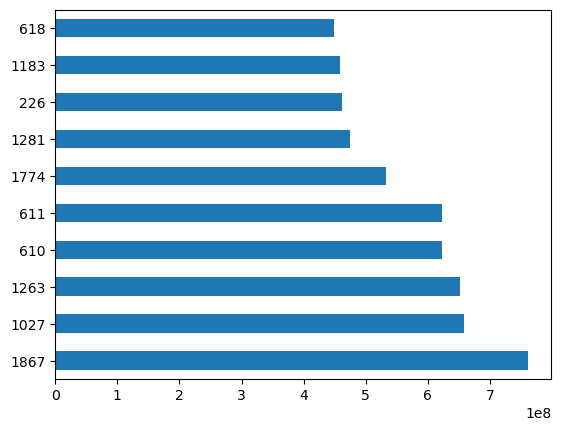

In [23]:
# Plotting the top 10 movies by 'Gross Earnings' as a horizontal bar chart
sorted_by_gross['Gross Earnings'].head(10).plot(kind="barh")

# Display the plot
plt.show()

### Code explanation:
* `import matplotlib.pyplot as plt:` Imports the `matplotlib.pyplot` library, giving us access to its plotting functions. By convention, it’s imported as plt.
* `sorted_by_gross['Gross Earnings'].head(10).plot(kind="barh")`: Selects only the Gross Earnings column from the sorted_by_gross dataframe.
    - `.head(10)` takes the top 10 rows from this column, here the 10 movies with the highest gross earnings.
    - `.plot(kind="barh")` creates a horizontal bar chart (`barh` stands for “bar horizontal”).
* `plt.show()`: This displays the plot. In Jupyter notebooks, this line is often optional, as plots render automatically. However, outside Jupyter, plt.show() is essential to make the plot appear.


We can further customize the plot with titles, labels, or colors to make the chart more informative. For instance:

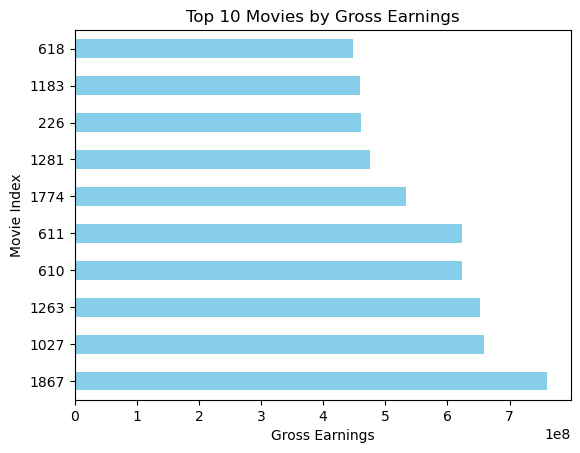

In [24]:
# Plot the top 10 movies by 'Gross Earnings' using a horizontal bar chart

# Selecting the top 10 values in the 'Gross Earnings' column of sorted_by_gross
sorted_by_gross['Gross Earnings'].head(10).plot(kind="barh", color="skyblue")

# Add a title to the plot
plt.title("Top 10 Movies by Gross Earnings")

# Label the x-axis to indicate it represents Gross Earnings values
plt.xlabel("Gross Earnings")

# Label the y-axis, which shows the indices of the movies in the DataFrame
plt.ylabel("Movie Index")

# Display the plot on the screen
plt.show()


### Code explanation
- `.head(10) extracts the top 10 rows, and plot(kind="barh", color="skyblue")`: Creates a horizontal bar chart with sky-blue bars.
- `plt.title("Top 10 Movies by Gross Earnings")`: Adds a descriptive title.
- `plt.xlabel("Gross Earnings")`: Adds label for the x-axis.
- `plt.ylabel("Movie Index")`: Adds label for the y-axis, showing row indices or movie names if the index is set to them.

**Task:** Explore the different types of plots available in `matplotlib` by experimenting with the kind parameter. This parameter allows you to create various types of visualizations. Try each option and determine which one best represents the data in a clear and meaningful way.

Here are the values you can use for kind:
- 'line': line plot (default)
- 'bar': vertical bar plot
- 'barh': horizontal bar plot
- 'hist': histogram
- 'box': boxplot
- 'kde': Kernel Density Estimation plot
- 'density': same as 'kde'
- 'area': area plot
- 'pie': pie plot
- 'scatter': scatter plot (DataFrame only)
- 'hexbin': hexbin plot (DataFrame only)

Experiment with these values and see how each visualization style impacts the readability of your data. Afterward, select the plot type that you think best highlights the top 10 movies by gross earnings and explain your choice.

### IMDb scores distribution
Let's create a histogram to analyze the distribution of IMDb scores across all movies. A histogram is an excellent tool for visualizing data distribution because it shows the frequency of values within specified ranges. We’ll apply the plot method to the IMDb scores in our movies dataframe and specify `kind="hist"` to produce a histogram.

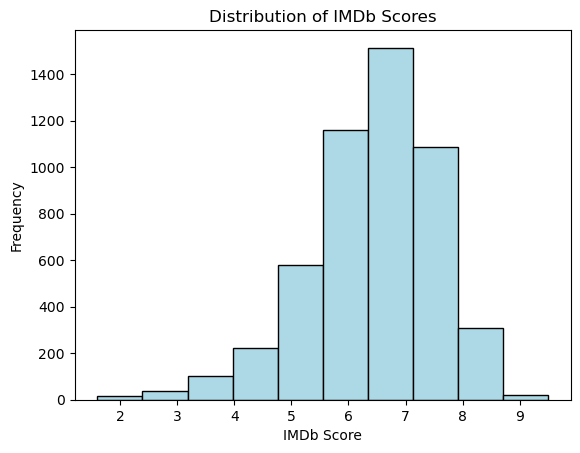

In [25]:
movies['IMDB Score'].plot(kind="hist", color="lightblue", edgecolor="black", bins=10)
plt.title("Distribution of IMDb Scores")
plt.xlabel("IMDb Score")
plt.ylabel("Frequency")
plt.show()

This visualization shows that most IMDb scores for the movies fall between six and eight, suggesting a central tendency around these values.

### Quiz #5
**What does a histogram represent?**

1. The distribution of a dataset’s frequency across specified ranges.
2. The relationship between two variables.
3. The cumulative values of a dataset.

<details>
<summary>Click here to see the answer</summary>

**The correct answer is:** 1. The distribution of a dataset’s frequency across specified ranges.

</details>

### Quiz #6
**In `movies['IMDB Score'].plot(kind="hist", bins=10)`, what does `bins=10`
 do?**

1. Limits the range of scores shown.
2. Divides IMDb scores into 10 groups or intervals.
3. Limits the number of movies displayed.

<details>
<summary>Click here to see the answer</summary>

**The correct answer is:** 2. Divides IMDb scores into 10 groups or intervals.

</details>

### Quiz #7
**What insight does the histogram provide about IMDb scores?**

1. Shows the most common ranges for IMDb scores.
2. Shows detailed statistics for each score.
3. Displays relationships between IMDb scores and other variables.

<details>
<summary>Click here to see the answer</summary>

**The correct answer is:** 1. Shows the most common ranges for IMDb scores.

</details>

### Activity #2

You can use the code cell below to test the codes proposed in this activity.

1. Use the histogram code provided to plot the IMDb scores, experimenting with different bins values (such as 5, 15, and 20) to see how the histogram changes. Note how increasing or decreasing the number of bins affects the interpretation of the score distribution. For this question, you can refer to the code in Quiz #6 above.

2. Identify the approximate range where most IMDb scores fall and the shape of the distribution. Does it seem balanced, skewed left, or skewed right?

Based on the histogram, discuss how the choice of `bin` size influences data interpretation. What patterns do you notice in the ratings distribution?

## Statistics <a id="statistics"></a> ([top](#home))
To gain more insights into the dataset, we can also use the method `describe`, which provides a summary of the statistical distribution, including the mean, median, quartiles, minimum, and maximum values.

In [26]:
# Generate a statistical summary of IMDb scores
movies['IMDB Score'].describe()

count    5042.000000
mean        6.442007
std         1.125189
min         1.600000
25%         5.800000
50%         6.600000
75%         7.200000
max         9.500000
Name: IMDB Score, dtype: float64

We are particularly interested here in the 'IMDB Score' column, but we can also describe all the variables directly with the code `movies['IMDB Score'].describe()` which provides the information for all the variables. You'll also note that this calculated information applies only to numerical values.


We can also use a particular method to access a given item of information. For example, to obtain the average of a particular column, you can use the mean method on that column:

In [27]:
movies["Gross Earnings"].mean()

48468407.52680933

### Reading files with no header

In some cases, Excel files lack a header row, which can make it challenging to identify column names automatically. With pandas, you can specify that there is no header, and pandas will use integer labels by default. Additionally, if the first few rows contain irrelevant data, you can instruct pandas to skip those rows. This flexibility allows you to manage and prepare data more effectively.

For example, in the Excel file below, the first four rows are not part of the actual data, and there is no header row:

<figure style="margin: 10px;">
        <img src="Tutorial_PythonExcel/movies_no_header.jpeg" alt="LibreOffice Chart" width="800"/>
        <figcaption style="text-align: center;">
    </figure>
    
This file can be downloaded here: [Tutorial2xls4-adcampaigns.xlsx](https://github.com/matgithub-picardy/ExcelPythonCourse/raw/refs/heads/main/Tutorial_PythonExcel/movies_no_header.xlsx).
    
The python code below downloads the file and displays the first five lines of the file:

In [28]:
import pandas as pd

# Load the file without using any row as a header and skip the first four rows
movies_skip_rows = pd.read_excel("Tutorial_PythonExcel/movies_no_header.xlsx", header=None, skiprows=4)
movies_skip_rows.head(5)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,Intolerance: Love's Struggle Throughout the Ages,1916,Drama|History|War,NaN,USA,Not Rated,123,1.33,385907.0,NaN,...,436,22,9.0,481,691,1,10718,88,69.0,8.0
1,Over the Hill to the Poorhouse,1920,Crime|Drama,NaN,USA,NaN,110,1.33,100000.0,3000000.0,...,2,2,0.0,4,0,1,5,1,1.0,4.8
2,The Big Parade,1925,Drama|Romance|War,NaN,USA,Not Rated,151,1.33,245000.0,NaN,...,81,12,6.0,108,226,0,4849,45,48.0,8.3
3,Metropolis,1927,Drama|Sci-Fi,German,Germany,Not Rated,145,1.33,6000000.0,26435.0,...,136,23,18.0,203,12000,1,111841,413,260.0,8.3
4,Pandora's Box,1929,Crime|Drama|Romance,German,Germany,Not Rated,110,1.33,NaN,9950.0,...,426,20,3.0,455,926,1,7431,84,71.0,8.0


In this code:
- `header=None` tells pandas not to use any row as a header.
- `skiprows=4` skips the first four rows of the Excel sheet, starting from the top.

This produces a DataFrame where column names are automatically numbered. Here, we can rename the columns to meaningful labels:

In [29]:
# Assigning descriptive column names
movies_skip_rows.columns = ['Title', 'Year', 'Genres', 'Language', 'Country', 'Content Rating', 'Duration', 'Aspect Ratio', 
                            'Budget', 'Gross Earnings', 'Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Facebook Likes - Director', 
                            'Facebook Likes - Actor 1', 'Facebook Likes - Actor 2', 'Facebook Likes - Actor 3', 
                            'Facebook Likes - cast Total', 'Facebook likes - Movie', 'Facenumber in posters', 
                            'User Votes', 'Reviews by Users', 'Reviews by Critics', 'IMDB Score']
movies_skip_rows.head()

,Title,Year,Genres,Language,Country,Content Rating,Duration,Aspect Ratio,Budget,Gross Earnings,...,Facebook Likes - Actor 1,Facebook Likes - Actor 2,Facebook Likes - Actor 3,Facebook Likes - cast Total,Facebook likes - Movie,Facenumber in posters,User Votes,Reviews by Users,Reviews by Critics,IMDB Score
0,Intolerance: Love's Struggle Throughout the Ages,1916,Drama|History|War,NaN,USA,Not Rated,123,1.33,385907.0,NaN,...,436,22,9.0,481,691,1,10718,88,69.0,8.0
1,Over the Hill to the Poorhouse,1920,Crime|Drama,NaN,USA,NaN,110,1.33,100000.0,3000000.0,...,2,2,0.0,4,0,1,5,1,1.0,4.8
2,The Big Parade,1925,Drama|Romance|War,NaN,USA,Not Rated,151,1.33,245000.0,NaN,...,81,12,6.0,108,226,0,4849,45,48.0,8.3
3,Metropolis,1927,Drama|Sci-Fi,German,Germany,Not Rated,145,1.33,6000000.0,26435.0,...,136,23,18.0,203,12000,1,111841,413,260.0,8.3
4,Pandora's Box,1929,Crime|Drama|Romance,German,Germany,Not Rated,110,1.33,NaN,9950.0,...,426,20,3.0,455,926,1,7431,84,71.0,8.0


Now the columns are renamed, making the data easier to work with.

### Quiz #8
**Which argument in read_excel is used to specify that no row should be treated as a header?**

1. skiprows
2. header
3. skip_footer
4. names

<details>
<summary>Click here to see the answer</summary>

**The correct answer is:** 2. header

</details>

### Quiz #9
**What happens when header=None is set in the read_excel function?A) It skips the first row and uses the second row as the header.**

1. It skips the first row and uses the second row as the header.
2. It skips the specified number of rows.
3. It skips the last row in the file.
4. It uses default numeric labels for the columns.

<details>
<summary>Click here to see the answer</summary>

**The correct answer is:** 4. It uses default numeric labels for the columns.

</details>

### Quiz #10
**If you want to skip the first three rows in an Excel file, which argument should you use?**

1. skiprows=3
2. skip_footer=3
3. header=3
4. skip_first=3

<details>
<summary>Click here to see the answer</summary>

**The correct answer is:** 1. skiprows=3

</details>

### Reading a subset of columns

When working with large datasets, you might not need all columns in your analysis. By default, read_excel imports every column in the file, but you can customize this by specifying only the columns you want to import.

To select the first seven columns, for instance, you can set usecols=6, which will include columns up to index six (column indexing starts from zero). Here’s an example: 

In [30]:
import pandas as pd

# Read only the first seven columns (index 0 to 6)
movies_subset_columns = pd.read_excel("Tutorial_PythonExcel/movies.xlsx", usecols=range(7))
print(movies_subset_columns.head())

                                               Title  Year  \
0  Intolerance: Love's Struggle Throughout the Ages   1916   
1                    Over the Hill to the Poorhouse   1920   
2                                    The Big Parade   1925   
3                                        Metropolis   1927   
4                                     Pandora's Box   1929   

                Genres Language  Country Content Rating  Duration  
0    Drama|History|War      NaN      USA      Not Rated       123  
1          Crime|Drama      NaN      USA            NaN       110  
2    Drama|Romance|War      NaN      USA      Not Rated       151  
3         Drama|Sci-Fi   German  Germany      Not Rated       145  
4  Crime|Drama|Romance   German  Germany      Not Rated       110  


Alternatively, you can specify a list of specific columns to import, which provides flexibility for importing non-contiguous columns.

### Applying formulas to columns

A useful feature in Excel is the ability to apply formulas directly to cells, such as creating new columns based on calculations from existing ones. For example, let’s calculate the "Net Earnings" in a movies dataset using the "Gross Earnings" and "Budget" columns:

In [31]:
# Create a new column by calculating Net Earnings
movies["Net Earnings"] = movies["Gross Earnings"] - movies["Budget"]

In this code, the new column "Net Earnings" is created by subtracting the values in Budget from Gross Earnings.
It’s important to note the difference between formulas in Excel and pandas: Excel formulas dynamically update if underlying data changes, while pandas stores calculated values directly in cells. If you modify a value in the "Gross Earnings" or "Budget column", "Net Earnings" will not automatically recalculate.

To analyze the movies with the highest earnings, we can sort the data by the new column and visualize the top 10 movies by "Net Earnings" in a bar plot:

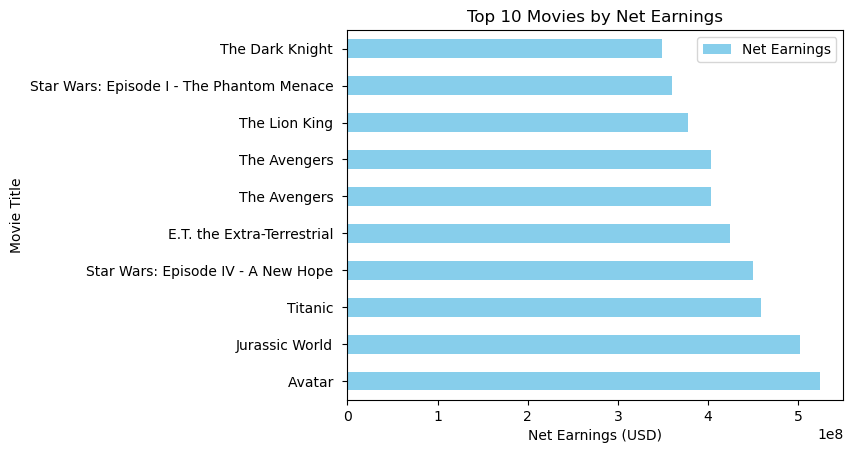

In [32]:
import matplotlib.pyplot as plt

# Sort and select the top 10 movies by Net Earnings
sorted_movies = movies[['Title', 'Net Earnings']].sort_values(by='Net Earnings', ascending=False)
sorted_movies.head(10).plot.barh(x='Title', y='Net Earnings', color='skyblue')
plt.title('Top 10 Movies by Net Earnings')
plt.xlabel('Net Earnings (USD)')
plt.ylabel('Movie Title')
plt.show()

### Quiz #11
**What does the `usecols=range(7)` argument do in the read_excel function?

1. Imports only the first six columns.
2. Excludes the first six columns.
3. Imports columns up to the seventh column (index 6).
4. Imports columns at positions 6 to 12.

<details>
<summary>Click here to see the answer</summary>

**The correct answer is:** 3. Imports columns up to the seventh column (index 6).

</details>

### Quiz #12
**What is the main difference between Excel formulas and pandas calculations?**

1. pandas formulas are stored within cells.
2. Excel automatically updates calculated values, but pandas does not.
3. pandas recalculates values if columns are modified.
4. Excel stores values, while pandas keeps formulas in cells.

<details>
<summary>Click here to see the answer</summary>

**The correct answer is:** 2. Excel automatically updates calculated values, but pandas does not.

</details>

### Quiz #13

**Which of the following functions is used to sort data by a specific column in pandas?**

1. sort_values()
2. order_by()
3. arrange()
4. organize()

<details>
<summary>Click here to see the answer</summary>

**The correct answer is:** 1. sort_values()

</details>

### Activity #3
Try this out on your own:
1. Import specific columns: Read only the "Title," "Gross Earnings," and "Budget" columns from an Excel file.
2. Calculate net earnings: Create a new column by subtracting "Budget" from "Gross Earnings."
3. Visualize the results: Sort the data by the "Net Earnings" column and visualize the top 5 entries in a bar chart.

To answer the questions, you need to modify the code below.

In [33]:
# Step 1: Import specific columns
movies_data = pd.read_excel("Tutorial_PythonExcel/movies.xlsx", usecols=['Column_1', 'Column_2'])

# Step 2: Calculate Net Earnings
movies_data["Net Earnings"] = movies_data["Column_3"] - movies_data["Column_4"]

# Step 3: Sort and visualize the top 5 movies by Net Earnings
top_5_movies = movies_data.sort_values(by='Column_5', ascending=False).head(4)
top_5_movies.plot.barh(x='Column_6', y='Column_7', color='teal')
plt.title('Top 5 Movies by Net Earnings')
plt.xlabel('Net Earnings (USD)')
plt.ylabel('Movie Title')
plt.show()

ValueError: Usecols do not match columns, columns expected but not found: ['Column_2', 'Column_1']

### Pivot tables with Pandas
Pivot tables are powerful tools often used by advanced Excel users to summarize data by grouping values and applying operations like sorting, summing, or averaging. In pandas, you can create similar tables to analyze and organize your data efficiently.

To create a pivot table in pandas, start by choosing the column(s) you want to use as the index for grouping. Then, select the column(s) containing the values to summarize. For example, let's use "Year" as the index and summarize data in the "Gross Earnings" column:

In [34]:
# Selecting relevant columns
movies_subset = movies[['Year', 'Gross Earnings']]
movies_subset.head()

,Year,Gross Earnings
0,1916.0,NaN
1,1920.0,3000000.0
2,1925.0,NaN
3,1927.0,26435.0
4,1929.0,9950.0


Now, we can use `pivot_table` with the index parameter. Here, Year is set as the index for grouping:

In [35]:
# Creating a pivot table to group Gross Earnings by Year
earnings_by_year = movies_subset.pivot_table(index='Year')
earnings_by_year.head()

,Gross Earnings
Year,
1920.0,3000000.0
1927.0,26435.0
1929.0,1408975.0
1933.0,2300000.0
1935.0,3000000.0


In this example, pandas automatically uses "Gross Earnings" as the column for summarization, defaulting to calculate the mean. This table helps us quickly see how earnings vary across different years.

To visualize this data, we can create a line plot:

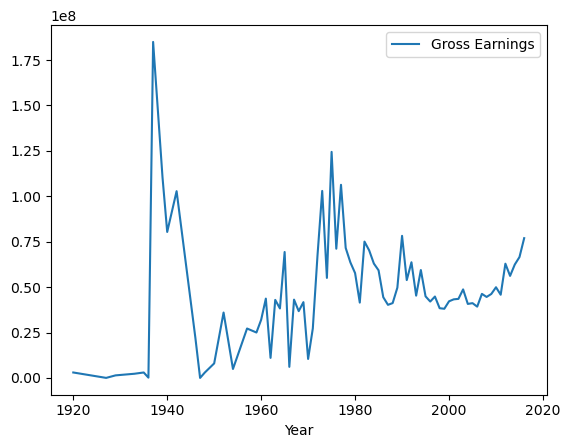

In [133]:
# Visualizing the data with a line plot
earnings_by_year.plot()
plt.show()

This visualization gives a clear picture of how "Gross Earnings" change over the years.

### Multiple index columns in pivot tables
Pandas also lets you use multiple columns as the index, which allows for more detailed grouping. For example, if we want to examine Gross Earnings by both Country and Language, we can create a pivot table with these columns as the index.

In [36]:
# Selecting columns for a more detailed pivot table
movies_subset = movies[['Country', 'Language', 'Gross Earnings']]
movies_subset.head()

,Country,Language,Gross Earnings
0,USA,NaN,NaN
1,USA,NaN,3000000.0
2,USA,NaN,NaN
3,Germany,German,26435.0
4,Germany,German,9950.0


Next, we use `pivot_table` with "Country" and "Language" as the indices:

In [37]:
# Grouping Gross Earnings by Country and Language
earnings_by_co_lang = movies_subset.pivot_table(index=['Country', 'Language'])
earnings_by_co_lang.head()

Gross Earnings
Country     Language                  
Afghanistan Dari          1.127331e+06
Argentina   Spanish       7.230936e+06
Aruba       English       1.007614e+07
Australia   Aboriginal    6.165429e+06
            Dzongkha      5.052950e+05

We can visualize this pivot table with a bar plot, showing data for the first 20 groups:

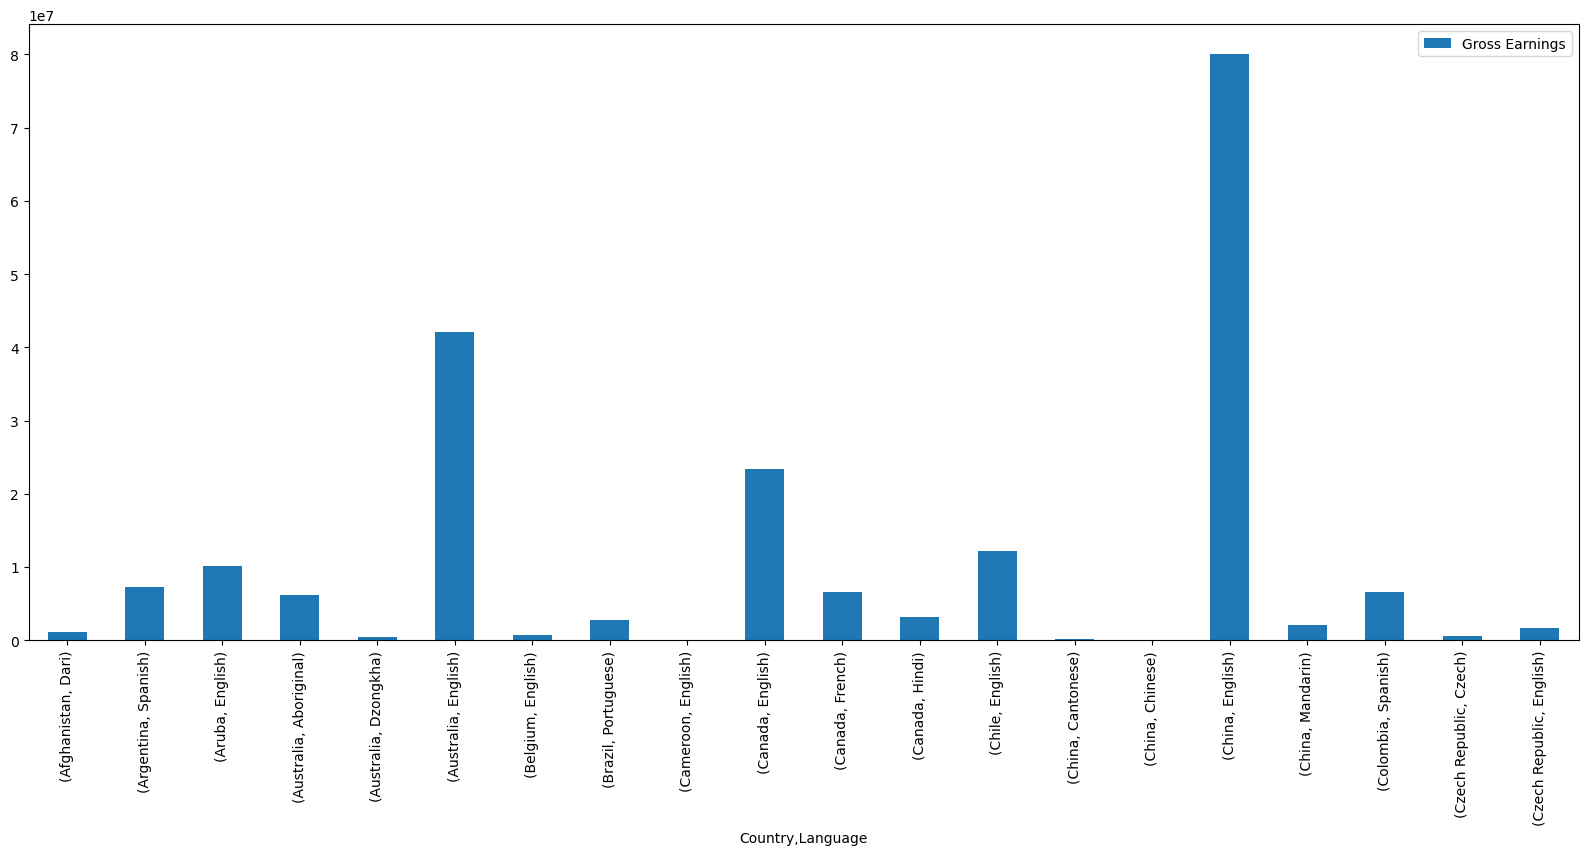

In [38]:
# Visualizing with a bar plot
earnings_by_co_lang.head(20).plot(kind='bar', figsize=(20,8))
plt.show()

This plot provides an overview of Gross Earnings for various countries and languages.

### Code Explanation
- `movies_subset = movies[['Year', 'Gross Earnings']]`: Selects only the Year and Gross Earnings columns from the movies DataFrame.
-``pivot_table(index='Year'`: Groups data by the Year column, automatically applying the mean to Gross Earnings.
- `earnings_by_co_lang.head(20).plot(kind='bar', figsize=(20,8)`: Plots the first 20 entries of the pivot table using a bar chart, with a customized figure size.

### Quiz #14
**What does the index parameter in `pivot_table` do?**

1. Groups the data by a specific column
2. Aggregates multiple columns
3. Selects columns to summarize
4. Sorts data by value

<details>
<summary>Click here to see the answer</summary>

**The correct answer is:** 1. Groups the data by a specific column

</details>

### Quiz #15
**If we use two columns as the index in `pivot_table`
, what happens?**

1. Only the first column is used
2. Data is grouped by both columns
3. Only numeric columns are used
4. The data table is sorted by both columns

<details>
<summary>Click here to see the answer</summary>

**The correct answer is:** 2. Data is grouped by both columns

</details>

### Quiz #16
**In a pivot table created with `pivot_table(index='Year'`, which operation is applied by default?**

1. `Median`
2. `Sum`
3. `Mean`
4. `Count`

<details>
<summary>Click here to see the answer</summary>

**The correct answer is:** 3. Mean

</details>

### Activity
1. Fix the code below to create a pivot table summarizing "Gross Earnings" by "Director" and "Genre".

2. Update the code to include the correct columns as the index and use "Gross Earnings" as the values column for summarization.

In [39]:
# Current code with an error in the column selection
earnings_by_dir_genre = movies_subset.pivot_table(index=['Director'], columns=['Genre'], values='Gross Earnings')
earnings_by_dir_genre.head()

KeyError: 'Director'

### Exporting the results to Excel

When collaborating with colleagues who use Excel, it's essential to know how to export data from pandas to an Excel file. This can be done using the to_excel method, which saves the contents of a DataFrame to an Excel file. By default, pandas includes the DataFrame’s index in the output file, though it can be omitted if it doesn't provide useful information.

For example, here’s how to save the movies DataFrame to an Excel file:

In [ ]:
# Basic export to Excel with index included
movies.to_excel('output.xlsx')

If you want to exclude the index, use `index=False`:

In [ ]:
# Export to Excel without including the index
movies.to_excel('output.xlsx', index=False)

Customizing the Output File
To make the output file visually appealing, you can apply custom formatting using the ExcelWriter class with the XlsxWriter engine. This allows you to adjust cell formatting, like setting bold headers.

Here’s an example:

In [ ]:
# Setting up the ExcelWriter object and specifying the engine
writer = pd.ExcelWriter('output.xlsx', engine='xlsxwriter')

# Writing the DataFrame to the writer object
movies.to_excel(writer, index=False, sheet_name='report')

# Accessing the workbook and worksheet for formatting
workbook = writer.book
worksheet = writer.sheets['report']

# Adding bold formatting to the header row
header_fmt = workbook.add_format({'bold': True})
worksheet.set_row(0, None, header_fmt)

# Saving the file
writer.save()

### Code explanation
- `to_excel('output.xlsx', index=False`: Exports the DataFrame to an Excel file without the index.
- `ExcelWriter('output.xlsx', engine='xlsxwriter'`: Creates an ExcelWriter object with XlsxWriter as the engine, enabling advanced formatting.
- `add_format({'bold': True}`: Applies bold formatting to the column headers.
- `writer.save(`: Saves the Excel file after custom formatting is applied.

In this example, we save the data with bold column headers, making the file easier to read and share with colleagues.

### Quiz #17
**What does index=False do when exporting a DataFrame to Excel?**

1. Removes the first column from the DataFrame
2. Excludes the DataFrame’s index from the Excel file
3. Adds an index to the Excel file
4. Saves the DataFrame as a csv file instead

<details>
<summary>Click here to see the answer</summary>

**The correct answer is:** 2. Excludes the DataFrame’s index from the Excel file

</details>

### Quiz #18
**What does ExcelWriter with XlsxWriter allow you to do?**

1. Change the DataFrame’s structure before export
2. Import Excel files with specific formatting
3. Apply custom formatting to the Excel file
4. Edit Excel files directly within pandas

<details>
<summary>Click here to see the answer</summary>

**The correct answer is:** 3. Apply custom formatting to the Excel file

</details>

### Quiz #19
**Which method should you call to save the file after applying custom formatting?**

1. `to_excel(`
2. `save()`
3. `finish(`
4. `export(`


<details>
<summary>Click here to see the answer</summary>

**The correct answer is:** 2. `save()

</details>

### Activity
Modify the code to save the movies DataFrame to an Excel file named "styled_output.xlsx" with the following changes:
- Exclude the index.
- Add a second sheet named summary that only includes columns "Year" and "Gross Earnings", formatted with bold headers.

### Conclusion
Pandas is not intended to replace Excel; on the contrary, the two tools complement each other well in a data analysis workflow. While Excel is widely used and very accessible, Pandas provides powerful tools for performing complex data manipulation and analysis that is often beyond the capabilities of Excel alone. One of the main advantages of using Python with Pandas is the ability to automate data processing, integrating it seamlessly into your data flow by writing reusable scripts. Pandas also makes it easy to read and export data to Excel files, allowing you to share results in a format familiar to colleagues who prefer Excel.

Excel's popularity and accessibility make it an essential tool not to be overlooked. Acquiring expertise in both Pandas and Excel allows you to capitalise on the strengths of each tool, giving you a set of multipurpose skills that can make you a valuable asset to your organisation.
